# Introduction to Regression with Neural Networks in TensorFlow

There are many defintions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow 
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

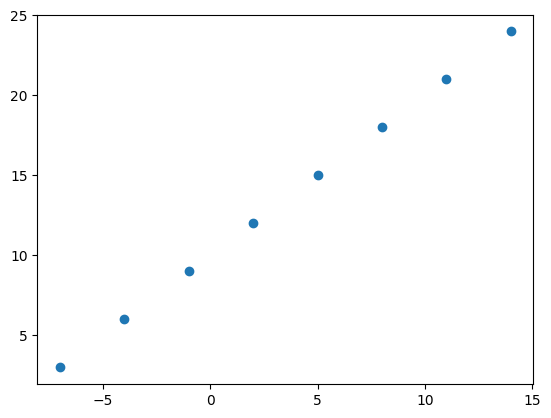

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

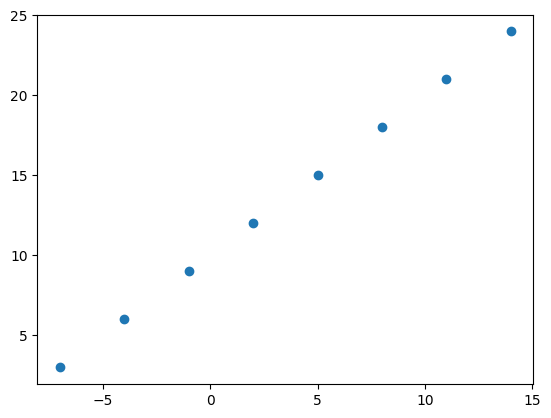

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 219ms/step - loss: 9.9552 - mae: 9.9552
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 9.8227 - mae: 9.8227
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 9.6902 - mae: 9.6902
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 9.5577 - mae: 9.5577
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 9.4252 - mae: 9.4252


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 [==============================] - 0s 53ms/step


array([[20.242569]], dtype=float32)

In [16]:
y_pred + 10

array([[30.242569]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 168ms/step - loss: 7.7032 - mae: 7.7032
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5707 - mae: 7.5707
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4738 - mae: 7.4738
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4681 - mae: 7.4681
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4625 - mae: 7.4625
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4569 - mae: 7.4569
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4513 - mae: 7.4513
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4456 - mae: 7.4456
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 7.440

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved...
model.predict(np.array([17.0]))

1/1 [==============================] - 0s 29ms/step


array([[30.100832]], dtype=float32)

In [20]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 328ms/step - loss: 12.4367 - mae: 12.4367
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.7193 - mae: 11.7193
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9932 - mae: 10.9932
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.2570 - mae: 10.2570
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 9.5090 - mae: 9.5090
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7473 - mae: 8.7473
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.9696 - mae: 7.9696
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 7.1733 - mae: 7.1733
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8418 - mae: 6.8418
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.1685 - mae: 7.1685
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - los

In [21]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Let's try to make a prediction
model.predict(np.array([17.0]))

1/1 [==============================] - 0s 33ms/step


array([[28.00691]], dtype=float32)

## Evaluating a model 

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

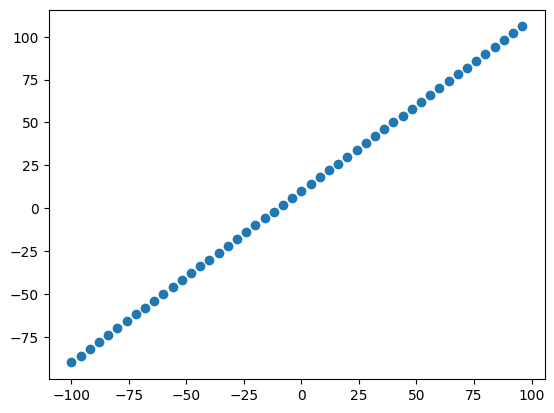

In [25]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [26]:
# Check the length of how many samples we have
len(X)

50

In [27]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing sample (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

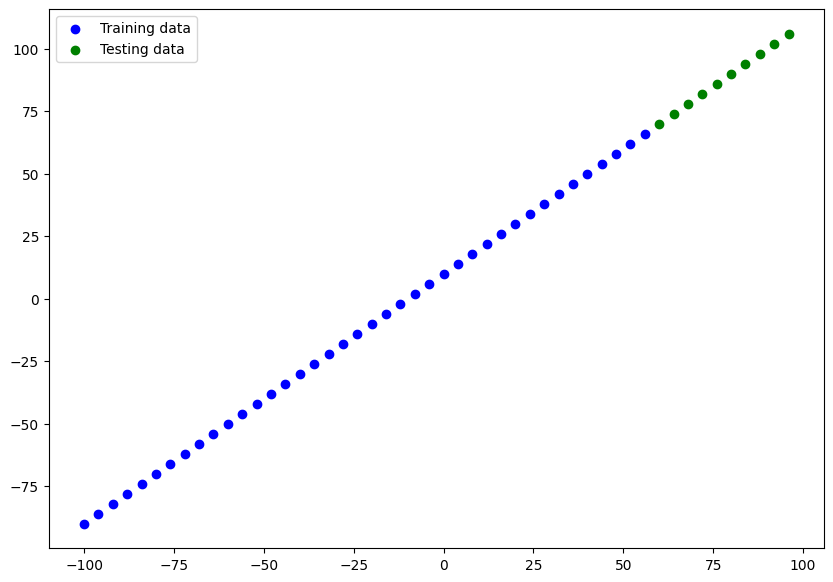

In [28]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [29]:
# Let's have a look at how to build a neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

## 3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [42]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [56]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer"),
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [57]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.

* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).
> 📖 **Resource**: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

> 🛠 **Exercise**: Try playing around with the number of hidden units in the `Dense` layer (e.g. `Dense(2)`, `Dense(3)`). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.

In [69]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [78]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [79]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [80]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [81]:
# Make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 14ms/step


array([[ 69.4288  ],
       [ 73.88489 ],
       [ 78.34097 ],
       [ 82.79706 ],
       [ 87.25315 ],
       [ 91.709236],
       [ 96.16532 ],
       [100.62141 ],
       [105.07749 ],
       [109.53358 ]], dtype=float32)

In [82]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

🔑 **Note:** If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [83]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

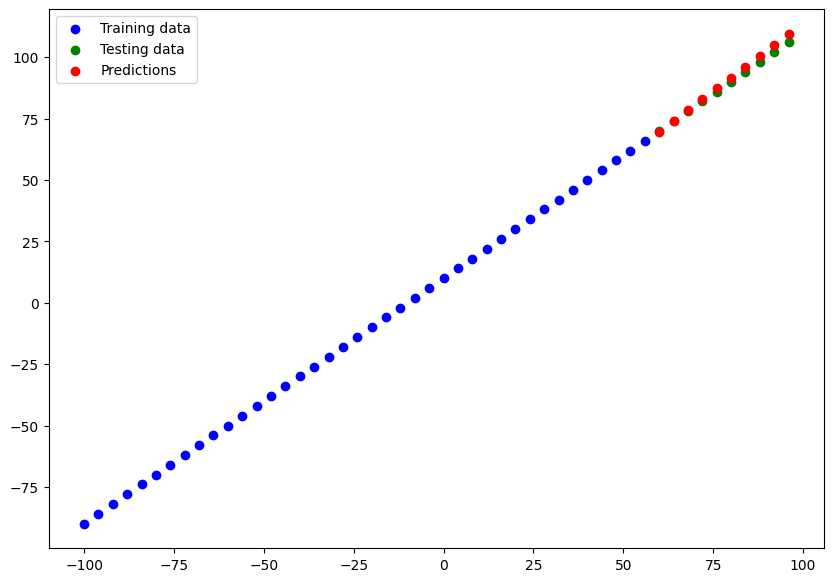

In [84]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluting our model's predictions with regression evaluation metrics

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use `model.evaluate()` which will return the loss of the model as well as any metrics setup during the compile step.

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.3335 - mae: 1.3335


[1.333544135093689, 1.333544135093689]

In [85]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.571198, 14.89209 , 12.263611, 10.640589, 10.      , 10.341847,
       11.666128, 13.972844, 17.261993, 21.533577], dtype=float32)>

In [36]:
tf.constant(y_pred)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[20.242569]], dtype=float32)>

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [86]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.4288  ,  73.88489 ,  78.34097 ,  82.79706 ,  87.25315 ,
        91.709236,  96.16532 , 100.62141 , 105.07749 , 109.53358 ],
      dtype=float32)>

In [87]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.6184524>

In [88]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=3.9100468>

In [89]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred=y_pred)

### Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build** `model_1`

In [92]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 39.9547 - mae: 39.9547
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 11.6012 - mae: 11.6012
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 11.6045 - mae: 11.6045
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.3944 - mae: 9.3944
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.2760 - mae: 10.2760
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.5268 - mae: 9.5268
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.6522 - mae: 8.6522
Epoch 8/100
2/2 [==============================] - 0s 997us/step - loss: 9.0589 - mae: 9.0589
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.9411 - mae: 18.9411
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.2255 - mae: 10.2255
Epoch 11/100
2/2 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 29ms/step


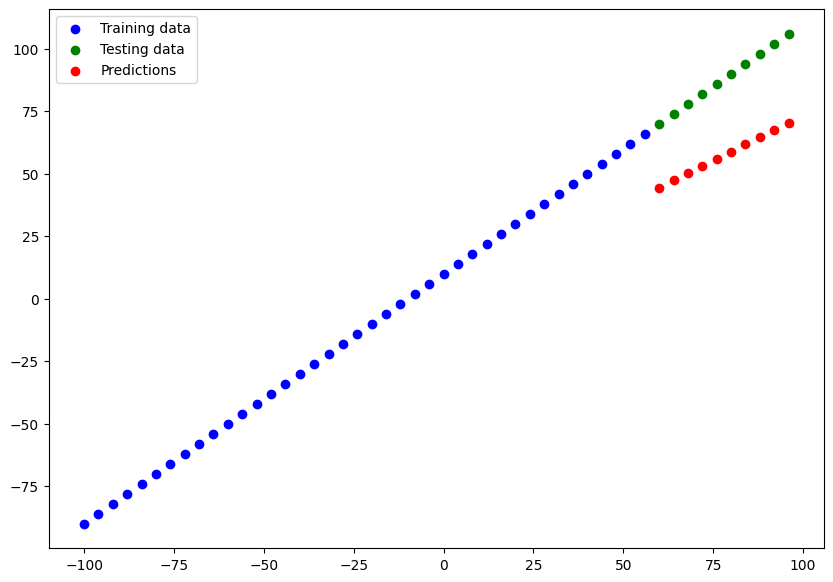

In [93]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [99]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.576172>,
 <tf.Tensor: shape=(), dtype=float32, numpy=945.27405>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [100]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 53.8366 - mae: 53.8366
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 29.1842 - mae: 29.1842
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 33.5432 - mae: 33.5432
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 30.9712 - mae: 30.9712
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 15.7395 - mae: 15.7395
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 12.4738 - mae: 12.4738
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.7380 - mae: 11.7380
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 12.1029 - mae: 12.1029
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 38.0178 - mae: 38.0178
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 25.6044 - mae: 25.6044
Epoch 11/100
2/2 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 33ms/step


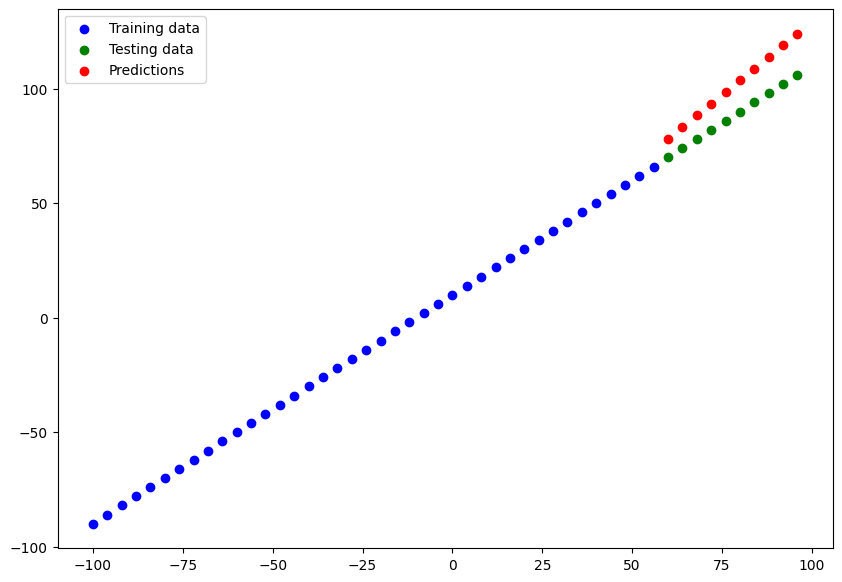

In [101]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [102]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.089638>,
 <tf.Tensor: shape=(), dtype=float32, numpy=181.20923>)

**Build `model_3`**

* 2 dense layers, trained for 500 epochs

In [103]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 22.6892 - mae: 22.6892
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 22.2326 - mae: 22.2326
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 28.4348 - mae: 28.4348
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 27.1833 - mae: 27.1833
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 14.8369 - mae: 14.8369
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 11.7989 - mae: 11.7989
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 11.1216 - mae: 11.1216
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 11.0577 - mae: 11.0577
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 40.1197 - mae: 40.1197
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 27.5581 - mae: 27.5581
Epoch 11/500
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 34ms/step


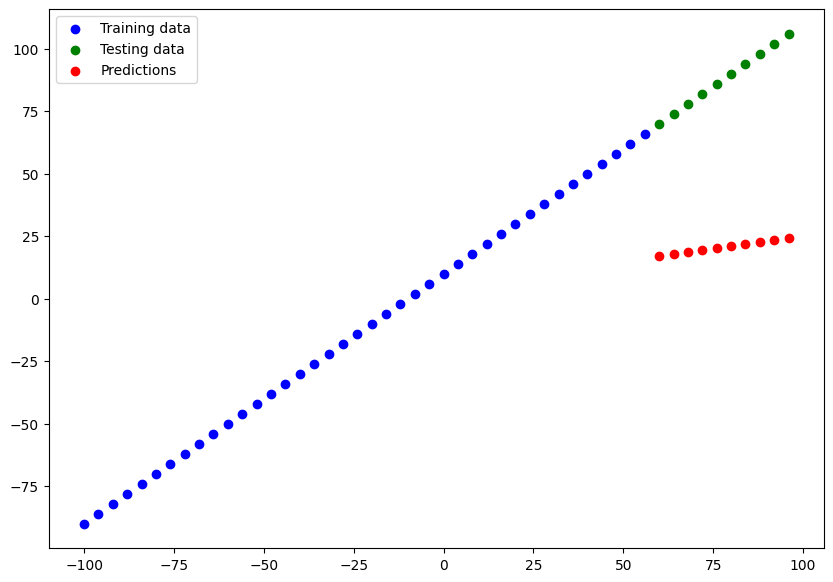

In [104]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [105]:
# Calculate model_1 evaluation metrics
mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.40194>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4626.497>)

🔑**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [107]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.576172,945.274048
1,model_2,13.089638,181.209229
2,model_3,67.401939,4626.497070


In [108]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

> 📖 Resource: But as you build more models, you'll want to look into using tools such as:

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving our models.

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using `model.save()`.

There are two ways to save a model in TensorFlow:

1. The SavedModel format (default).
2. The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [111]:
# Save model using the SavedModel format
model_2.save("./model/best_model_SavedModel_format")

INFO:tensorflow:Assets written to: ./model/best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: ./model/best_model_SavedModel_format\assets


In [112]:
# Save model using the HDF5 format
model_2.save("./model/best_model_HDF5_format.h5")

## Loading in a saved model

In [130]:
# Load in the SavedModel format model
loaded_SavedModel_Format = tf.keras.models.load_model('./model/best_model_HDF5_format.h5')
loaded_SavedModel_Format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [131]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_Format_preds = loaded_SavedModel_Format.predict(X_test)
model_2_preds == loaded_SavedModel_Format_preds

1/1 [==============================] - 0s 31ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [132]:
# Compare the MAE of model_2 preds and loaded_SavedModel preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_Format_preds)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [133]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("./model/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [134]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 31ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

> 🔑 **Note:** When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [85]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
# Read in the insurance dataset
insurance = pd.read_csv("./data/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [87]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [88]:
for column in insurance_one_hot.select_dtypes(include=['bool']).columns:
    insurance_one_hot[column] = insurance_one_hot[column].astype(int)

In [89]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [90]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [91]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [92]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [93]:
# Build a neural network (sort or like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8730.1572 - mae: 8730.1572
Epoch 2/100
34/34 [==============================] - 0s 576us/step - loss: 7848.5513 - mae: 7848.5513
Epoch 3/100
34/34 [==============================] - 0s 606us/step - loss: 7569.1191 - mae: 7569.1191
Epoch 4/100
34/34 [==============================] - 0s 577us/step - loss: 7605.4058 - mae: 7605.4058
Epoch 5/100
34/34 [==============================] - 0s 607us/step - loss: 7675.4165 - mae: 7675.4165
Epoch 6/100
34/34 [==============================] - 0s 576us/step - loss: 7614.3164 - mae: 7614.3164
Epoch 7/100
34/34 [==============================] - 0s 939us/step - loss: 7586.2285 - mae: 7586.2285
Epoch 8/100
34/34 [==============================] - 0s 728us/step - loss: 7816.0557 - mae: 7816.0557
Epoch 9/100
34/34 [==============================] - 0s 577us/step - loss: 7635.3682 - mae: 7635.3682
Epoch 10/100
34/34 [==============================] - 0s 577us/step - loss: 7732.252

In [94]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 871us/step - loss: 8650.1094 - mae: 8650.1094


[8650.109375, 8650.109375]

In [95]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but Train for longer
3. (insert your own experiment here)

In [96]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [97]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 818us/step - loss: 13294.9492 - mae: 13294.9492
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13127.4307 - mae: 13127.4307
Epoch 3/100
34/34 [==============================] - 0s 824us/step - loss: 12779.5820 - mae: 12779.5820
Epoch 4/100
34/34 [==============================] - 0s 636us/step - loss: 12093.8691 - mae: 12093.8691
Epoch 5/100
34/34 [==============================] - 0s 697us/step - loss: 10938.9814 - mae: 10938.9814
Epoch 6/100
34/34 [==============================] - 0s 636us/step - loss: 9462.5674 - mae: 9462.5674
Epoch 7/100
34/34 [==============================] - 0s 636us/step - loss: 8126.0000 - mae: 8126.0000
Epoch 8/100
34/34 [==============================] - 0s 697us/step - loss: 7508.4224 - mae: 7508.4224
Epoch 9/100
34/34 [==============================] - 0s 636us/step - loss: 7414.5537 - mae: 7414.5537
Epoch 10/100
34/34 [==============================] - 0s 667us/step - loss

In [98]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 875us/step - loss: 4733.0308 - mae: 4733.0308


[4733.03076171875, 4733.03076171875]

In [99]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 750us/step - loss: 8650.1094 - mae: 8650.1094


[8650.109375, 8650.109375]

In [100]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 818us/step - loss: 13300.3721 - mae: 13300.3721
Epoch 2/200
34/34 [==============================] - 0s 697us/step - loss: 13170.8506 - mae: 13170.8506
Epoch 3/200
34/34 [==============================] - 0s 697us/step - loss: 12903.2334 - mae: 12903.2334
Epoch 4/200
34/34 [==============================] - 0s 636us/step - loss: 12358.8086 - mae: 12358.8086
Epoch 5/200
34/34 [==============================] - 0s 636us/step - loss: 11387.1738 - mae: 11387.1738
Epoch 6/200
34/34 [==============================] - 0s 636us/step - loss: 9999.2021 - mae: 9999.2021
Epoch 7/200
34/34 [==============================] - 0s 606us/step - loss: 8548.3672 - mae: 8548.3672
Epoch 8/200
34/34 [==============================] - 0s 667us/step - loss: 7649.9360 - mae: 7649.9360
Epoch 9/200
34/34 [==============================] - 0s 667us/step - loss: 7445.5640 - mae: 7445.5640
Epoch 10/200
34/34 [==============================] - 0s 727us/step - lo

In [101]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 876us/step - loss: 3502.9939 - mae: 3502.9939


[3502.993896484375, 3502.993896484375]

In [102]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 877us/step - loss: 8650.1094 - mae: 8650.1094


[8650.109375, 8650.109375]

Text(0.5, 0, 'epochs')

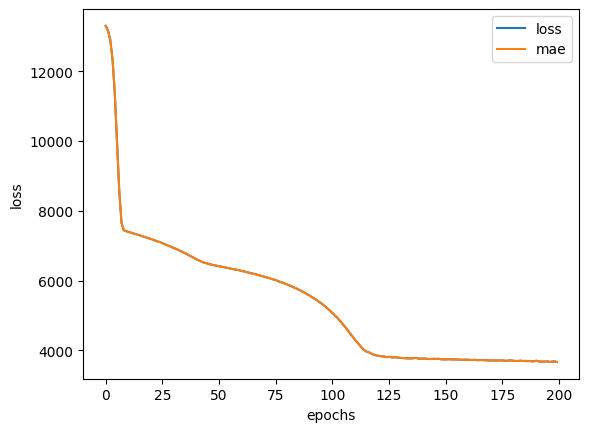

In [103]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

> 🤔 **Question:** How long should you train for?

> It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [Feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
  * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
  * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
  * Which one should you use?
    * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.
  > 📖 Resource: For more on preprocessing data, I'd recommend reading the following resources:

* [Scikit-Learn's documentation on preprocessing data.](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data)
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("./data/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [111]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
  (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
  (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [112]:
# What dose our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [115]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [116]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [118]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model 
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 818us/step - loss: 13343.8887 - mae: 13343.8887
Epoch 2/100
34/34 [==============================] - 0s 727us/step - loss: 13336.3193 - mae: 13336.3193
Epoch 3/100
34/34 [==============================] - 0s 718us/step - loss: 13316.9922 - mae: 13316.9922
Epoch 4/100
34/34 [==============================] - 0s 667us/step - loss: 13275.6436 - mae: 13275.6436
Epoch 5/100
34/34 [==============================] - 0s 697us/step - loss: 13201.2363 - mae: 13201.2363
Epoch 6/100
34/34 [==============================] - 0s 758us/step - loss: 13082.9365 - mae: 13082.9365
Epoch 7/100
34/34 [==============================] - 0s 697us/step - loss: 12910.4521 - mae: 12910.4521
Epoch 8/100
34/34 [==============================] - 0s 758us/step - loss: 12673.5889 - mae: 12673.5889
Epoch 9/100
34/34 [==============================] - 0s 697us/step - loss: 12361.9775 - mae: 12361.9775
Epoch 10/100
34/34 [==============================] - 0s 727us/s

In [119]:
# Evalaute our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3441.7590 - mae: 3441.7590


[3441.759033203125, 3441.759033203125]

In [ ]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 875us/step - loss: 4733.0308 - mae: 4733.0308

In [117]:
insurance_model_2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 1, 100)            1200      
                                                                 
 dense_51 (Dense)            (None, 1, 10)             1010      
                                                                 
 dense_52 (Dense)            (None, 1, 1)              11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


<Axes: ylabel='Frequency'>

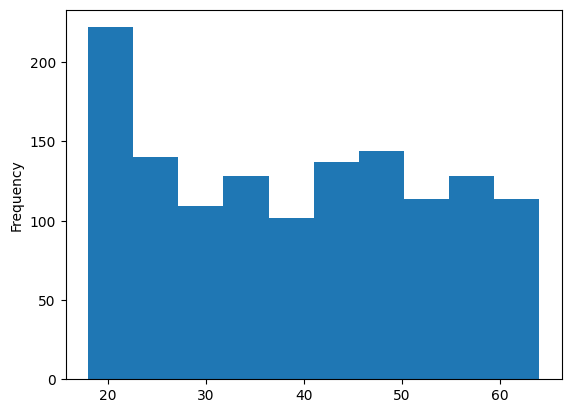

In [107]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

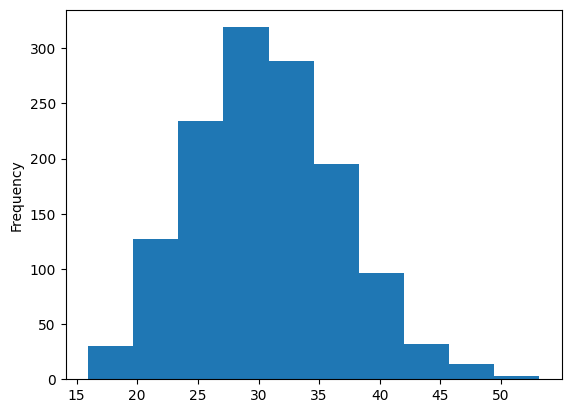

In [108]:
X["bmi"].plot(kind="hist")

In [109]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64